# Read The Prepared Data 

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import joblib

from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error

from sklearn.metrics import r2_score

from sklearn.preprocessing import OrdinalEncoder

In [2]:
all_data = pd.read_pickle(r'./data/processed/all_data.pickle')

In [3]:
all_data.drop(columns=[
    'Area name',
    'Area type',
    'Specimen date',
    'LAD16NM'
], inplace=True)

In [4]:
all_data.drop(columns=[
    'Cumulative lab-confirmed cases',
    # 'grad_n7',
    # 'previous_day_daily_cases',
    #'rolling_r0_3',
    'K_value_2',
    'name',
    'AREAEHECT',
    'AREACHECT',
    'AREAIHECT'
], inplace=True)

In [5]:
all_data.dropna(inplace=True)

In [6]:
all_data.columns

Index(['Area code', 'Daily lab-confirmed cases',
       'Cumulative lab-confirmed cases rate', 'Date', 'Name', 'Geography1',
       'Population', 'grad_0', 'grad_n3', 'grad_n7', 'current_r0',
       'previous_day_daily_cases', 'previous_day_cumulative_cases',
       'previous_day_cc_rate', 'rolling_previous_day_cc_rate_3',
       'rolling_r0_3', 'rolling_r0_7', 'rolling_previous_day_daily_cases_4',
       'active_infections', 'currently_suseptible', 'recovered', 'K_value_1',
       'previous_rolling_r0_7', 'r0_7_gradient', 'risk_score',
       'cases_over_100_startdelta', 'cases_over_100_enddelta',
       'cases_over_100_active', 'schools_closed_startdelta',
       'schools_closed_enddelta', 'schools_closed_active',
       'restaurants_cafes_closed_startdelta',
       'restaurants_cafes_closed_enddelta', 'restaurants_cafes_closed_active',
       'nationwide_lockdown_startdelta', 'nationwide_lockdown_enddelta',
       'nationwide_lockdown_active', 'median age', 'population density',
   

In [7]:
all_data.drop(columns=[
    'cases_over_100_enddelta',
    'cases_over_100_active',
    'schools_closed_startdelta',
    'schools_closed_enddelta',
    'schools_closed_active',
    'restaurants_cafes_closed_startdelta',
    'restaurants_cafes_closed_enddelta',
    'restaurants_cafes_closed_active',
    'nationwide_lockdown_startdelta',
    'nationwide_lockdown_enddelta',
    'nationwide_lockdown_active',
    'K_value_1',
    'population density deciles',
    'Dependency Ratio',
    'Cumulative lab-confirmed cases rate'
], inplace=True)

In [8]:
# all_data['new_infections'] = all_data['current_r0'] * all_data['rolling_previous_day_daily_cases_4']

# Predict R0

## XGRegressor (Shuffled Split Validation Data) 

In [9]:
X = all_data.drop(columns=['Date', 'current_r0', 'Daily lab-confirmed cases'])

In [10]:
y = all_data['current_r0']

In [11]:
ordinal_encoder = OrdinalEncoder()

In [12]:
X = ordinal_encoder.fit_transform(X)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [14]:
xg_regressor = XGBRegressor()

In [15]:
xg_regressor.fit(X_train, y_train, early_stopping_rounds=2, eval_set=[(X_test, y_test)])

[0]	validation_0-rmse:0.86387
Will train until validation_0-rmse hasn't improved in 2 rounds.
[1]	validation_0-rmse:0.67403
[2]	validation_0-rmse:0.55353
[3]	validation_0-rmse:0.47393
[4]	validation_0-rmse:0.42590
[5]	validation_0-rmse:0.39030
[6]	validation_0-rmse:0.37295
[7]	validation_0-rmse:0.35651
[8]	validation_0-rmse:0.34872
[9]	validation_0-rmse:0.34262
[10]	validation_0-rmse:0.34004
[11]	validation_0-rmse:0.33479
[12]	validation_0-rmse:0.33042
[13]	validation_0-rmse:0.32770
[14]	validation_0-rmse:0.32429
[15]	validation_0-rmse:0.32161
[16]	validation_0-rmse:0.31939
[17]	validation_0-rmse:0.31805
[18]	validation_0-rmse:0.31637
[19]	validation_0-rmse:0.31543
[20]	validation_0-rmse:0.31528
[21]	validation_0-rmse:0.31477
[22]	validation_0-rmse:0.31374
[23]	validation_0-rmse:0.31351
[24]	validation_0-rmse:0.31278
[25]	validation_0-rmse:0.31151
[26]	validation_0-rmse:0.30996
[27]	validation_0-rmse:0.31002
[28]	validation_0-rmse:0.30969
[29]	validation_0-rmse:0.30856
[30]	validation_

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

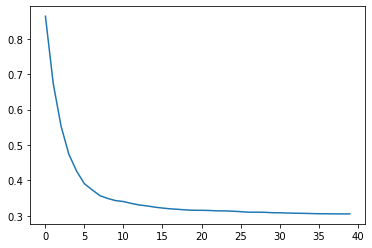

In [16]:
plt.plot(xg_regressor.evals_result()['validation_0']['rmse'])
plt.show()

In [17]:
y_pred = xg_regressor.predict(X_test)

In [18]:
r2_score(y_test, y_pred)

0.887348196355725

In [19]:
np.sqrt(mean_squared_error(y_test, y_pred))/y_test.mean()

0.25585593372607823

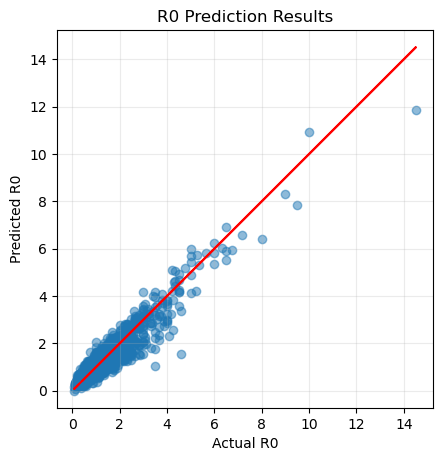

In [20]:
fig, ax = plt.subplots(figsize=(8,5), dpi=100)
ax.scatter(y_test, y_pred, alpha=0.5)
ax.set_aspect('equal')
ax.plot(y_test, y_test, 'r-')
plt.title('R0 Prediction Results')
plt.xlabel('Actual R0')
plt.ylabel('Predicted R0')
plt.grid(which='both', alpha=0.25)
plt.show()

In [21]:
joblib.dump(xg_regressor,'./data/models/xgregressor_current_r0.joblib')

['./data/models/xgregressor_current_r0.joblib']

In [22]:
features = all_data.drop(columns=['Date', 'current_r0']).columns

In [23]:
feature_imp = pd.DataFrame(xg_regressor.feature_importances_, columns=['Imp'])

In [24]:
feature_imp['Features'] = all_data.drop(columns=['Date', 'current_r0', 'Daily lab-confirmed cases']).columns

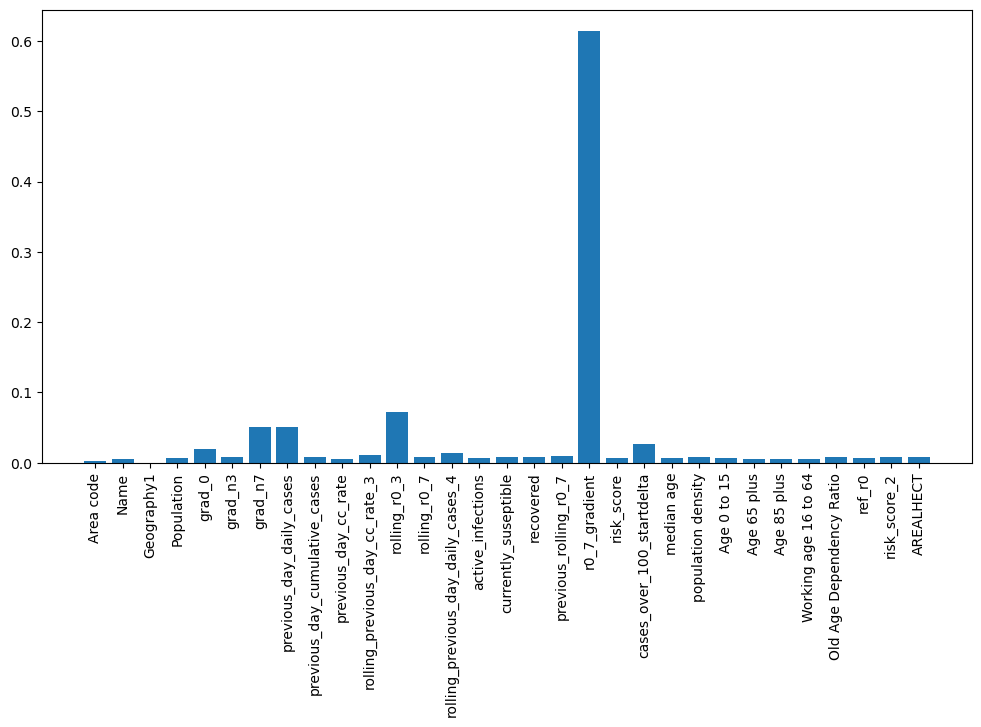

In [25]:
plt.figure(figsize=(12,6), dpi=100)
plt.bar(x=feature_imp['Features'], height=feature_imp['Imp'])
plt.xticks(rotation=90)
plt.show()

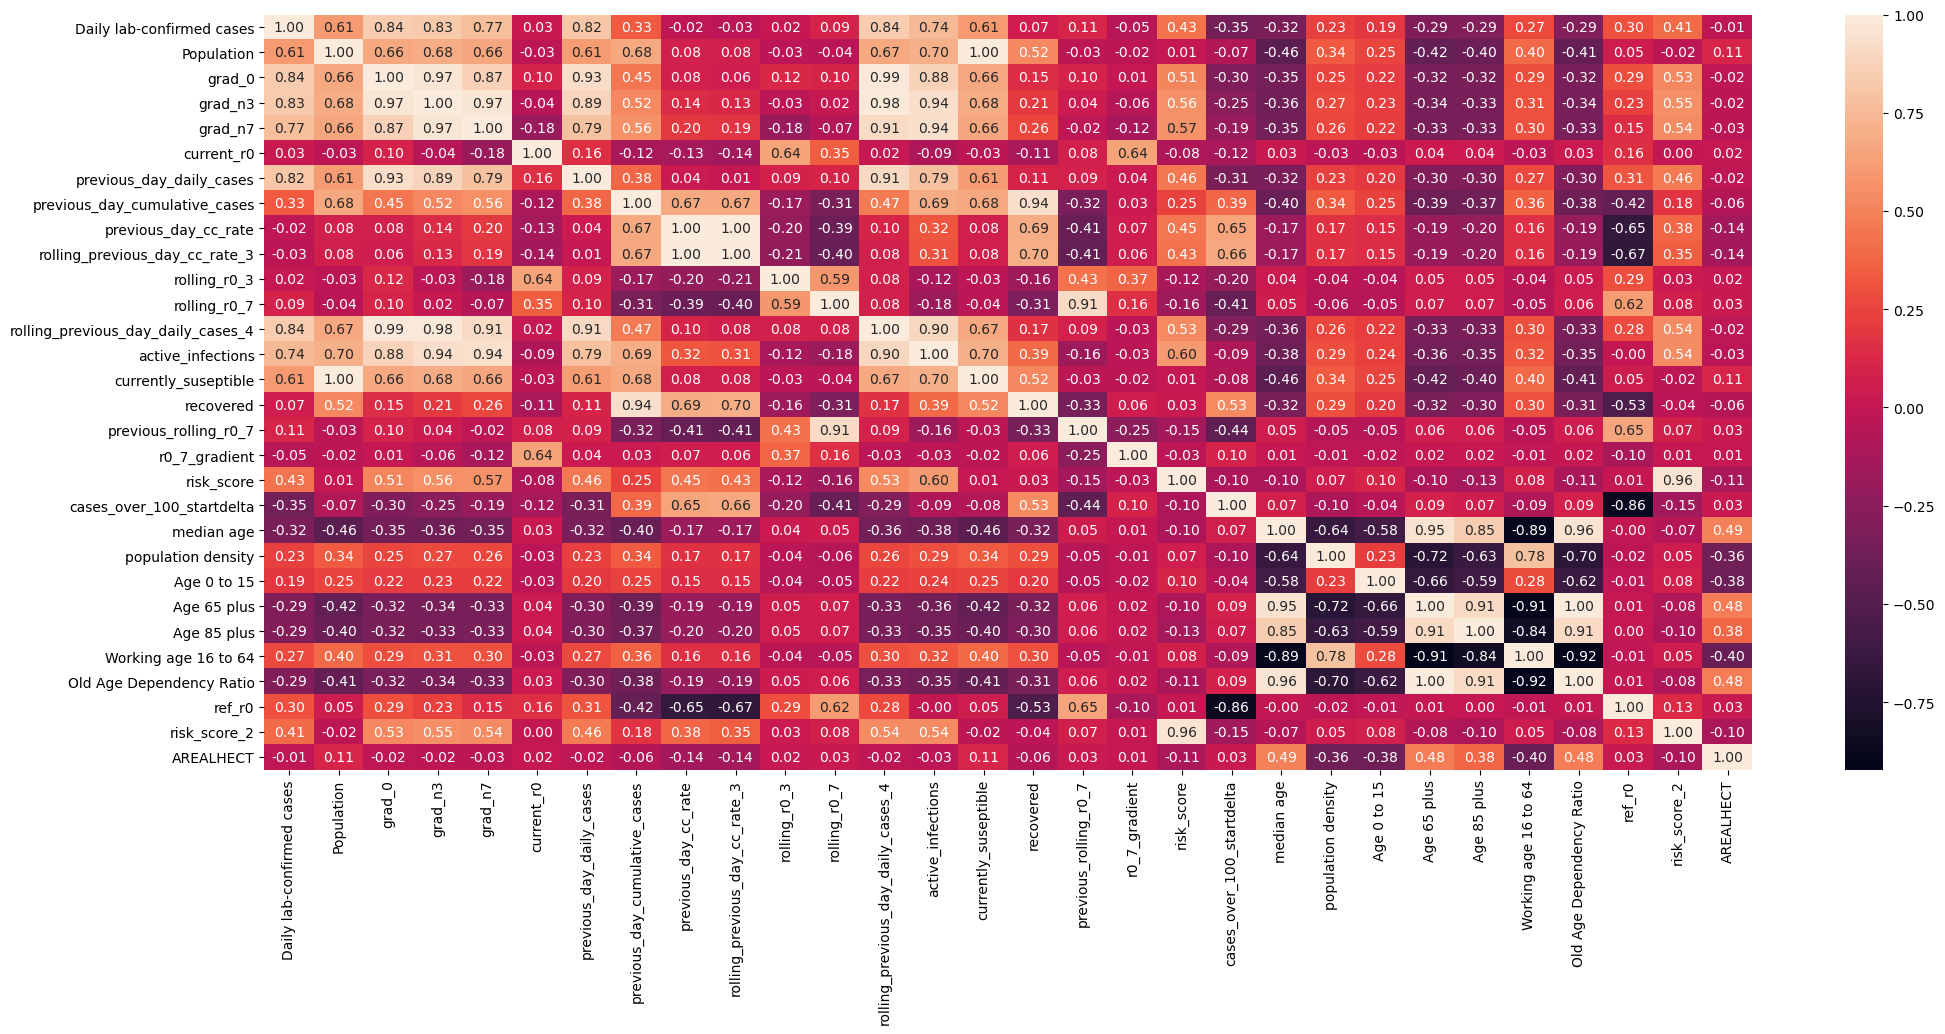

In [27]:
plt.figure(figsize=(24,10), dpi=100)
sns.heatmap(all_data.corr(), annot=True, fmt='.2f')
plt.show()

In [28]:
from sklearn.model_selection import cross_val_score

In [29]:
cvs = cross_val_score(xg_regressor, X, y, scoring='r2', cv=5)

In [30]:
cvs.mean()

0.8646660167564179

# Calculating Risk